<a href="https://colab.research.google.com/github/ML-Challenge/week3-supervised-learning/blob/master/L3.Model%20Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

## Setup

In [1]:
# Download utils.py to working directory
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/utils.py', 'utils.py')

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

## Creating train, test and validation datasets

We define a holdout dataset as any data that is not used for training and is only used to assess model performance. The available data is split into two datasets. One used for training, and one that is simply off-limits while we are training our models, called a test (or holdout) dataset.

This step is vital to model validation and is the number one step we can take to ensure our model's performance. We use the holdout sample as a testing dataset so that we can have an unbiased estimate for our model's performance after we are completely done training. 

Generally, a good rule of thumb is using an `80:20` split. This equates to setting aside twenty percent of the data for the test set and using the rest for training. We might choose to use more training data when the overall data is limited (`90:10`), or less training data if the modeling method is computationally expensive (`70:30`).

### Dataset for preliminary testing?

We know that the test set is off-limits until we are completely done training, but what do we do when testing model parameters? For example, if we run a random forest model with 100 trees and one with 1000 trees, which dataset do we use to test these results? When testing parameters, tuning hyperparameters, or anytime we are frequently evaluating model performance, we need to create a second holdout sample, called the validation dataset.

For this dataset, the available data is the original training dataset, which is then split in the same manner used to split the original complete dataset. We use the validation sample to asses our model's performance when using different parameter values.

To create both holdout samples, the testing, and the validation datasets, we use scikit-learn's `train_test_split()` function twice. The first call will create training and testing datasets like normal

```
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
```

The second call we split this so-called temporary training dataset into the final training and validation datasets.

```
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42)
```

In the above example, we used first an 80/20 split to create the test set. With the 80% training dataset, we used a 75/25 split to create a validation dataset. This is leaving us with 60% of the data for training, 20% for validation, and 20% for testing.

![Train, test, validation](assets/train_test_validation.png)

## Accuracy metrics: regression models

Now that we've learned about holdout samples, let's discuss accuracy metrics used when validating models - starting with regression models. Remember, regression models, are built for continuous variables. This could be predicting the number of points a player will score tomorrow, or the number of puppies a dog is about to have!

### Mean absolute error (MAE)

To assess the performance of a regression model, we can use the mean absolute error. It is the simplest and most intuitive error metric and is the average absolute difference between the predictions $y_i$ and the actual values $\hat{y}$:

$$ MAE = \frac{\sum_{i=1}^n |y_i - \hat{y}_i|}{n} $$

If a dog had six puppies, but we predicted only four, the absolute difference would be two. This metric treats all points equally and is not sensitive to outliers. When dealing with applications where we don't want large errors to have a major impact, the mean absolute error can be used. An example could be predicting the car's monthly gas bill, when a one-time road trip may have caused an outlier.

Communicating modeling results can be difficult. However, most clients people that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy. For example, when predicting the number of wins for a basketball team, if we predict 42, and they end up with 40, we can easily explain that the error was two wins.

In this example, we have two arrays. `y_test`, the true number of wins for all 30 NBA teams in 2017, and `predictions`, which contains a prediction for each team. Let's calculate the MAE both manually using `sklearn`.

In [4]:
from sklearn.metrics import mean_absolute_error

In [5]:
# Manually calculate the MAE
n = len(utils.nba_predictions)
mae_one = sum(abs(utils.nba_y_test - utils.nba_predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

With a manual calculation, the error is 5.9


In [6]:
# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(utils.nba_y_test, utils.nba_predictions)
print('Using scikit-lean, the error is {}'.format(mae_two))

Using scikit-lean, the error is 5.9


### Mean squared error (MSE)

Next is the mean squared error (MSE). It is the most widely used regression error metric for regression models. It is calculated similarly to the mean absolute error, but this time we square the difference term.

$$ MSE = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} $$

The MSE allows larger errors to have a larger impact on the model. Using the previous car example, if we knew once a year we might go on a road trip, we might expect to have a large error occasionally and would want our model to pick up on these trips.

Let's focus on the 2017 NBA predictions again. Every year, there are at least a couple of NBA teams that win way more games than expected. If you use the MAE, this accuracy metric does not reflect the bad predictions as much as if you use the MSE. Squaring the large errors from bad predictions will make the accuracy even bad.

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
n = len(utils.nba_predictions)
# Finish the manual calculation of the MSE
mse_one = sum((utils.nba_y_test - utils.nba_predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

With a manual calculation, the error is 49.1


In [9]:
# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(utils.nba_y_test, utils.nba_predictions)
print('Using scikit-lean, the error is {}'.format(mse_two))

Using scikit-lean, the error is 49.1


### MAE vs MSE

Picking between the MAE and the MSE comes down to the application. These results are in different units, though, and should not be directly compared!

### Performance on data subsets

In professional basketball, there are two conferences, the East and the West. Coaches and fans often only care about how teams in their conference will do this year.

We have been working on an NBA prediction model. We would like to determine if the predictions were better for the East or West conference. We added a third array to the data called `utils.nba_labels`, which contains an "E" for the East teams, and a "W" for the West.

In [10]:
# Find the East conference teams
east_teams = utils.nba_labels == "E"

In [11]:
# Create arrays for the true and predicted values
true_east = utils.nba_y_test[east_teams]
preds_east = utils.nba_predictions[east_teams]

In [12]:
# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mean_absolute_error(true_east, preds_east)))

The MAE for East teams is 6.733333333333333


In [13]:
# Create arrays for the true and predicted values
true_west = utils.nba_y_test[~east_teams]
preds_west = utils.nba_predictions[~east_teams]

In [14]:
# Print the accuracy metrics
print('The MAE for West teams is {}'.format(mean_absolute_error(true_west, preds_west)))

The MAE for West teams is 5.066666666666666


It looks like the Western conference predictions were about two games better on average. Over the past few seasons, the Western teams have generally won the same number of games as the experts have predicted. Teams in the East are just not as predictable as those in the West.

## Classification metrics

We already understand classification models; now, let's look at their accuracy metrics. Classification accuracy metrics are quite a bit different than regression ones. Remember, with classification models; we are predicting what category an observation falls into. There are a lot of accuracy metrics available: `precision`, `recall` (also called `sensitivity`), `accuracy`, `specificity`, `F1-Score`, and it's variations and several others.

We will focus on precision, recall, and accuracy as each of these are easy to understand and have very practical applications. One way to calculate these metrics is to use the values from the confusion matrix.

### Confusion matrices

When making predictions, especially if there is a binary outcome, this matrix is one of the first outputs we should preview. When we have a binary outcome, the confusion matrix is a 2x2 matrix that shows how our predictions faired across the two outcomes. For example, for predictions of `0` that were actually `0` (or true negatives), we look at the `0,0` square of the matrix.

![Confusion matrix](assets/confusion_matrix.png)

All of the above accuracy metrics can be calculated using the values from this matrix, and it is a great way to visualize the initial results of our classification model.

We can create a confusion matrix using `scikit-learn`'s function `confusion_,matrix()`. When dealing with binary data, this will print out a 2x2 array which represents the confusion matrix. In this matrix, the row index represents the true category, and the column index represents the predicted category. Therefore, the 1,0 entry of the array represents the number of true `1s` that were predicted to be `0`, or 8 in this example.

### Accuracy

Accuracy is the easiest metric to understand and represents the overall ability of the model to correctly predict the correct classification. Using the confusion matrix, we add the values were predicted `0` and are actually `0` (which are called true negatives), to the values predicted to be `1` that are `1` (called true positives), and then divide by the total number of observations:

$$ Accuracy = \frac{TN + TP}{TN + FP + FN + TP} = \frac{23 + 62}{23 + 7 + 8 + 62} = 0.85 $$

In this case, our accuracy was 85%. In this example, we can associate a true positive as predicted 1's that are also 1's. However, if our categories were win or loss, we might associate a true positive as the number of predicted wins that won.

### Precision

Next is precision or the number of true positives out of all predicted positive values:

$$ Precision = \frac{TP}{TP + FP} = \frac{62}{62 + 7} = 0.90 $$

Precision is used when we don't want to over-predict positive values. It costs $2,000 to fly-in potential new employee's, a company may only have on-campus interviews with individuals that they believe are going to join their company. In the example, almost 9 out of 10 predicted 1's would have joined the company.

### Recall

The recall metric is about finding all positive values:

$$ Recall = \frac{TP}{TP + FN} = \frac{62}{62 + 8} = 0.885 $$

Here we correctly predicted 62 true positives and had 8 false negatives. Our recall is 62 out of 70. The recall is used when we can't afford to miss any positive values. For example, even if a patient has a small chance of having cancer, we may want to give them additional tests. The cost of missing a patient who has cancer is far higher than the cost of additional screenings for that patient.

Accuracy, precision, and recall are called similarly. Use the desired accuracy metric function and provide the 'true' and predicted values.

```
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, test_predictions) # .85
precision_score(y_test, test_predictions) # .8986
recall_score(y_test, test_predictions) # .8857
```

A single value will be produced as a result. In this example, we got the same values that we calculated using the confusion matrix.

### Confusion matrices, again

Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the `sklearn` implementation of confusion matrices. Here, we have created a `classifier` model using the `tic_tac_toe` dataset to predict outcomes of 0 (loss) or 1 (a win) for Player One.

In [15]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = utils.classifier.predict(utils.X_test)

# Create and print the confusion matrix
cm = confusion_matrix(utils.y_test, test_predictions)
print(cm)

[[113 191]
 [  7 552]]


In [16]:
# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))

The number of true positives is: 552


### Precision vs. recall

The accuracy metrics we use to evaluate our model should always be based on the specific application. For this example, let's assume we are a really sore loser when it comes to playing Tic-Tac-Toe, but only when we are certain that we are going to win.

We need to choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if we think we are going to win, we better win!

In [17]:
from sklearn.metrics import precision_score

In [18]:
# Create precision or recall score based on the metric you imported
score = precision_score(utils.y_test, test_predictions)

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 0.74


## The bias-variance tradeoff

Let's try to identify when we have a good fitting model. One way to do this is to consider bias and variance.

### Variance

Variance occurs when a model pays too close attention to the training data and fails to generalize to the testing data. These models perform well on only the training data, but not on the testing data, and are considered to overfit.

Overfitting occurs when our model starts to attach meaning to the noise in the training data. In the following graphic, we can see the natural quadratic shape of the orange dots. However, our blue prediction line is hugging the data and would likely not extend well to new orange dots.
![Overfitting](assets/overfitting.png)
Overfitting is easy to identify, though, as the training error will be a lot lower than the testing error.

### Bias

The second term, `Bias`, occurs when the model fails to find the relationships between the data and the response value. Bias leads to high errors in both the training and testing datasets and is associated with an underfit model. Underfitting occurs when the model could not find the underlying patterns available in the data. In this example, we have the average of the actual values acting as our prediction.
![Underfitting](assets/underfitting.png)
Underfitting is more difficult to identify because the training and testing errors will both be high, and it's difficult to know if we got the most out of the data, or if we can improve the testing error.

### Optimal performance

When our model is getting the most out of the training data, while still performing on the testing data, we have optimal performance. Notice how the blue line is matching the natural quadratic shape of the data, and that is not touching every orange dot. The blue line is a well-fit prediction line for future data.
![Optimal performance](assets/optimal_performance.png)
So how do we tell if we have a good fit, or if we are underfitting?

## More on metrics

In classification, we've seen that we can use accuracy, the fraction of correctly classified samples, to measure model performance. However, accuracy is not always a useful metric.

### Class imbalance example: Emails

Consider a spam classification problem in which 99% of emails are real, and only 1% are spam. We could build a model that classifies all emails as real; this model would be correct 99% of the time and thus have an accuracy of 99%, which sounds great. However, this naive classifier does a horrible job of predicting spam: it never predicts spam at all, so it utterly fails at its original purpose.

The situation when one class is more frequent is called class imbalance because the class of real emails contains way more instances than the class of spam. This is a widespread situation in practice and requires a more nuanced metric to assess the performance of our model.

### Diagnosing classification predictions

Given a binary classification task, such as our spam email example, we can draw up the 2x2 confusion matrix. Note that correctly labeled spam emails are the true positives and correctly labeled real emails as true negatives. While incorrectly labeled, spam will be referred to as false negatives and incorrectly labeled real emails as false positives.

Usually, the "class of interest" is called the positive class. As we are trying to detect spam, this makes spam the positive class.

### F1 Score

The F1-Score is defined as two times the product of the precision and recall divided by the sum of the precision and recall; in other words, it's the harmonic mean of precision and recall:

$$ F_{1score} = \frac{Precision * Recall}{Precision + Recall} $$

To put it in everyday language, high precision means that our classifier had a low false-positive rate; this is, not many real emails were predicted as being spam. Intuitively, high recall means that our classifier predicted most positive or spam emails correctly.

Here, we'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and the number of pregnancies. Therefore, it is a binary classification problem. A target value of `0` indicates that the patient does not have diabetes. In contrast, a value of `1` indicates that the patient does have diabetes.

In [19]:
utils.diabetes.head()                       

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As in Lessons 1 and 2, the dataset has been preprocessed to deal with missing values.

In [22]:
utils.diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Our job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [29]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Create training and test set
X = utils.diabetes.drop('diabetes', axis=1)
y = utils.diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

In [35]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [36]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [37]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



The support gives the number of samples of the true response that lie in that class. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

## Logistic regression and the ROC curve

It is time to introduce another model to our classification arsenal: logistic regression. Despite its name, logistic regression is used in classification problems, not regression problems. We won't go into the mathematical details here, see the optional mathematics sections for that. However, we will provide an intuition towards how logistic regression or log reg works for binary classification, that is when we have two possible labels for the target variable.

### Logistic regression for binary classification

Given one feature, log reg will output a probability, `p`, with respect to the target variable. If `p` is greater than 0.5, we label the data as `'1'`; if `p` is less than 0.5, we label it as `'0'`.

![Logistic regression](assets/log_reg.png)
Not that log reg produces a linear decision boundary.

Using logistic regression in `scikit-learn` follows exactly the same formula that we now know so well: perform the necessary imports, instantiate the classifier, split the data into training and test sets, fit the model on the training data, and predict on the test set.

```
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
```

### Probability thresholds

By default, logistic regression uses a threshold of 0.5, a threshold that defines our model. Note that this is not particular for log reg but also could be used for KNN, for example. Now, what happens as we vary this threshold? In particular, what happens to the true positive and false positive rates as we vary the threshold?

### The ROC curve

When the threshold equals 0, the model predicts '1' for all the data, which means the true positive rate is equal to the false positive rate is equal to 1.
![p=0](assets/roc_1.png)

When the threshold equals 1, the model predicts '0' for all the data, which means both true and false positive rates are zero.
![p=1](assets/roc_2.png)

If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates.
![p varies](assets/roc_3.png)

The set of points we get when trying all possile threshold is called the `Receiver Operating Characteristic curve` or `ROC curve`
![ROC](assets/roc_4.png)

### Plotting the ROC curve

To plot the ROC curve, we import `roc_curve` from `sklearn.metrics`; we then call the function `roc_curve()`; the first argument is given by the actual labels, the second by the predicted probabilities. We unpack the result into three variables: false positive rate, FPR; true positive rate TPR; and the thresholds. 

```
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()
```

We can then plot the FPR and TPR using `pyplot's` plot function to produce a figure as this:
![Plotted ROC](assets/roc_5.png)
We used the predicted probabilities of the model assigning a value of '1' to the obeservation in question. This is because to compute ROC we don't merely want the predictions on the test set, but we want the probability that our log reg model outputs before using a threshold to predict the label. To do this we apply the method `.predict_proba()` to the model and pass it the test data. `.predict_proba()` returns an array with two columns: each column contains the probabilities for the respective target values. We choose the second column, the one with index 1, that is, the probabilities of the predicted labels being '1'.

### Building a logistic regression model

Time to build our first logistic regression model! As already shown, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. We'll see this now as we train a logistic regression model on exactly the same data as in the previous example. Will it outperform k-NN? There's only one way to find out!

In [38]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression

In [44]:
# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear')

In [45]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [47]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



Logistic regression is used in a variety of machine learning applications. It will become a vital part of your data science toolbox.

Classification reports and confusion matrices are great methods to evaluate model performance quantitatively. At the same time, ROC curves provide a way to evaluate models visually. Most classifiers in scikit-learn have a `.predict_proba()` method, which returns the probability of a given sample being in a particular class. Having built a logistic regression model, we'll now evaluate its performance by plotting a ROC curve. In doing so, we'll make use of the `.predict_proba()` method and become familiar with its functionality.

In [48]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [49]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [52]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

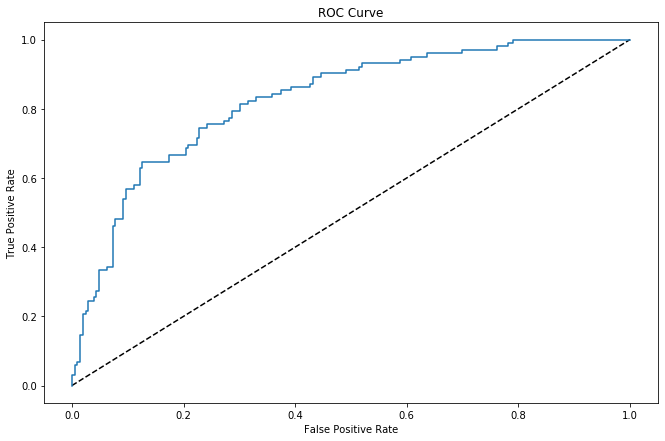

In [51]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area under the ROC curve (AUC)

Now the question is: given the ROC curve, can we extract a metric of interest? Consider the following: the larger the area under the ROC curve, the better our model is! 

The way to think about this is the following: if we had a model that produced a ROC curve that had a single point at 1,0, the upper left corner, representing a true positive rate of one and a false positive rate of zero, this would be a great model!

![Perfect ROC](assets/roc_6.png)

For this reason, the area under the ROC, commonly denoted as AUC, is another popular metric for classification models.

![Perfect AUC](assets/auc_1.png)

### AUC computation

Say we have a binary classifier that, in fact, is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this example, we'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

In [53]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [54]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [55]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239482


In [56]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y , cv=5, scoring='roc_auc')

In [57]:
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80759259 0.81944444 0.86622642 0.85056604]
